In [42]:
from random import*
import numpy as np
from pylab import*
import matplotlib.pyplot as plt

texte formule: $$\sum_{j}^i e^{-j_a^2}$$ voila

In [43]:
x=0.008
y=0.008
z=0.008
a=0.008
g=0.002
coopa=0.008
coopm=0.008
eps=0.6
Pdn=10**-4

C=10**-5
K=150

#on ne prend pas en compte eta et omega

M0=np.array([[1-x, x, 0], [y+0.5*g, 1-y-z-g, z+0.5*g], [0, a, 1-a]])
MT=np.array([[-eps, 0, eps], [0 ,-eps ,eps], [0, 0, 0]])
Mcoopa=np.array([[0,0,0],[1,-1,0],[0,1,-1]])
Mcoopm=np.array([[-1,1,0],[0,-1,1],[0,0,0]])

In [111]:
def evol(nuc,T,Pn):
    for i in range(2):
        if T==0:
            r=random()
            if r<=Pn:
                nuc[i,1]=1
        if T==1:
            r=random()
            if r<=Pdn:
                nuc[1]=0
        pourquoifairesimplequandonpeutfairecomplique=[0,1]
        pourquoifairesimplequandonpeutfairecomplique.remove(i)
        j=pourquoifairesimplequandonpeutfairecomplique[0]
        M=M0+nuc[i,1]*MT
        if nuc[j,0]==2:
            M=M0+nuc[i,1]*MT+coopm*Mcoopm
        if nuc[j,0]==0:
            M=M0+nuc[i,1]*MT+coopa*Mcoopa
        r=random()
        if r<=M[nuc[i,0],0] :
            nuc[i,0]=0
        elif r<=(M[nuc[i,0],0]+M[nuc[i,0],1]) :
            nuc[i,0]=1
        else :
            nuc[i,0]=2
    return(nuc)

def simulation(winter, spring,n=35): #winter et srping en jours
    L=np.array([[[0,0],[0,0]] for i in range(n)])
    liste=[]
    T=0
    for i in range(winter*1440):
        Pn=(C*(i**2)/(K*(1440**2)+i**2))
        for j in range(len(L)):
            L[j]=evol(L[j],T,Pn)
        if i%7200==0:
            liste.append(L)
    T=1
    for i in range(spring*1440):
        for j in range(len(L)):
            L[j]=evol(L[j],T,Pn)
        if i%7200==0:
            liste.append(L)
    return(liste)


In [112]:
n=simulation(10,10)

In [113]:
n

[array([[[2, 0],
         [0, 0]],
 
        [[1, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [2, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[2, 0],
         [2, 0]],
 
        [[1, 0],
         [1, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[2, 0],
         [2, 0]],
 
        [[2, 0],
         [2, 0]],
 
        [[1, 0],
         [0, 0]],
 
        [[1, 0],
         [2, 0]],
 
        [[1, 0],
         [0, 0]],
 
        [[2, 0],
         [0, 0]],
 
        [[1, 0],
         [2, 0]],
 
        [[0, 0],
         [2, 0]],
 
        [[1, 0],
         [0, 0]],
 
        [[1, 0],
         [2, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[2, 0],
         [2, 0]],
 
        [[0, 0],
         [1, 0]],
 
        [[0, 0],
         [1, 0]],
 
        [[1, 0],
         [0, 0]],
 
        [[2, 0],
         [1, 0]],
 
        [[1, 0],
         [1, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
 

In [114]:
len(n)

4

In [52]:
def unlist(L):
    M=[]
    for i in L:
        for j in i:
            M+=[j]
    return (M)

In [172]:
p=unlist(n[0])
p=np.array(p)
np.savetxt("p.txt",p, delimiter=",")



p=genfromtxt("p.txt", delimiter=",")
p=np.ndarray.tolist(p)# liste pour count pour histo


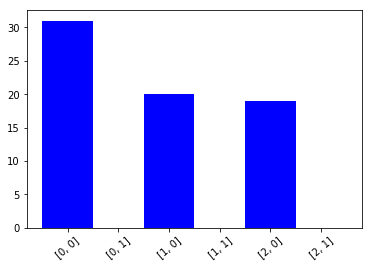

In [168]:

b=p.count([0, 0])
c=p.count([0, 1])
d=p.count([1, 0])
e=p.count([1, 1])
f=p.count([2, 0])
g=p.count([2, 1])

fig = plt.figure()

h = [1,2,3,4,5,6]
height = [b,c,d,e,f,g]
width = 1.0
BarName = ['[0, 0]','[0, 1]','[1, 0]','[1, 1]','[2, 0]','[2, 1]']

plt.bar(h, height, width, color='b' )

plt.xticks(h, BarName, rotation=40)
plt.savefig('SimpleBar.png')
plt.show()

70